In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv')

X = data.drop('CLASS', axis=1)
y = data['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_scaled = scaler.fit_transform(X) 
cv_scores = cross_val_score(mlp, X_scaled, y_encoded, cv=5)
print("Cross-validated scores:", cv_scores)
print("Average cross-validated score:", cv_scores.mean())


c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7937743190661478

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.21      0.30       112
           1       0.81      0.96      0.88       402

    accuracy                           0.79       514
   macro avg       0.69      0.58      0.59       514
weighted avg       0.76      0.79      0.75       514



c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validated scores: [0.79008746 0.80466472 0.80174927 0.79239766 0.79532164]
Average cross-validated score: 0.7968441511943123


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.metrics import accuracy_score, classification_report

url = "https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv"
data = pd.read_csv(url)

X = data.drop('CLASS', axis=1) 
y = data['CLASS'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')

y_pred_mlpc = mlpc_model.predict(X_test_scaled)
accuracy_mlpc = accuracy_score(y_test, y_pred_mlpc)
print("MLPClassifier Accuracy:", accuracy_mlpc)
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlpc))

y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandomForestClassifier Accuracy:", accuracy_rf)
print("RandomForestClassifier Classification Report:\n", classification_report(y_test, y_pred_rf))


AttributeError: 'str' object has no attribute 'predict'

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

url = "https://github.com/ouladsayadyounes/WildFires/raw/master/WildFires_DataSet.csv"
data = pd.read_csv(url)

X = data.drop('CLASS', axis=1)
y = data['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')

acc_mlpc = accuracy_score(y_test, mlpc_model.predict(X_test_scaled))
acc_rf = accuracy_score(y_test, rf_model.predict(X_test_scaled))

voting_clf = VotingClassifier(estimators=[('mlpc', mlpc_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
acc_voting = accuracy_score(y_test, voting_clf.predict(X_test_scaled))

stacking_clf = StackingClassifier(estimators=[('mlpc', mlpc_model), ('rf', rf_model)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)
acc_stacking = accuracy_score(y_test, stacking_clf.predict(X_test_scaled))

improvement_mlpc = max(acc_voting - acc_mlpc, acc_stacking - acc_mlpc)
improvement_rf = max(acc_voting - acc_rf, acc_stacking - acc_rf)

best_method_mlpc = "vote" if acc_voting - acc_mlpc > acc_stacking - acc_mlpc else "stack"
best_method_rf = "vote" if acc_voting - acc_rf > acc_stacking - acc_rf else "stack"

print(f"Random Forest Accuracy: {acc_rf:.4f} + {improvement_rf:.4f} ({best_method_rf})")
print(f"MLP Classifier Accuracy: {acc_mlpc:.4f} + {improvement_mlpc:.4f} ({best_method_mlpc})")

best_mlpc_model = voting_clf if best_method_mlpc == "vote" else stacking_clf
best_rf_model = voting_clf if best_method_rf == "vote" else stacking_clf

joblib.dump(best_mlpc_model, 'best_mlpc_model.joblib')
joblib.dump(best_rf_model, 'best_rf_model.joblib')

print("Best MLP Classifier and Random Forest models saved successfully.")


c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\s1298\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Accuracy: 0.8268 + -0.0058 (stack)
MLP Classifier Accuracy: 0.7918 + 0.0292 (stack)
Best MLP Classifier and Random Forest models saved successfully.


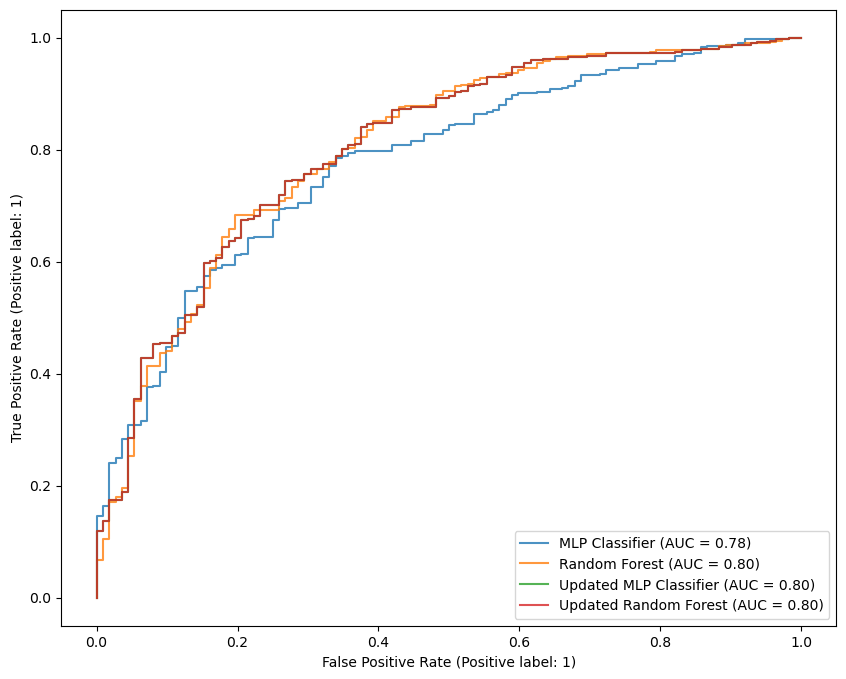

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import joblib

mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')
best_mlpc_model = joblib.load('best_mlpc_model.joblib')
best_rf_model_model = joblib.load('best_rf_model.joblib')
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

RocCurveDisplay.from_estimator(mlpc_model, X_test_scaled, y_test, ax=ax, name='MLP Classifier', alpha=0.8)
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=ax, name='Random Forest', alpha=0.8)
RocCurveDisplay.from_estimator(best_mlpc_model, X_test_scaled, y_test, ax=ax, name='Updated MLP Classifier', alpha=0.8)
RocCurveDisplay.from_estimator(best_rf_model, X_test_scaled, y_test, ax=ax, name='Updated Random Forest', alpha=0.8)

plt.show()


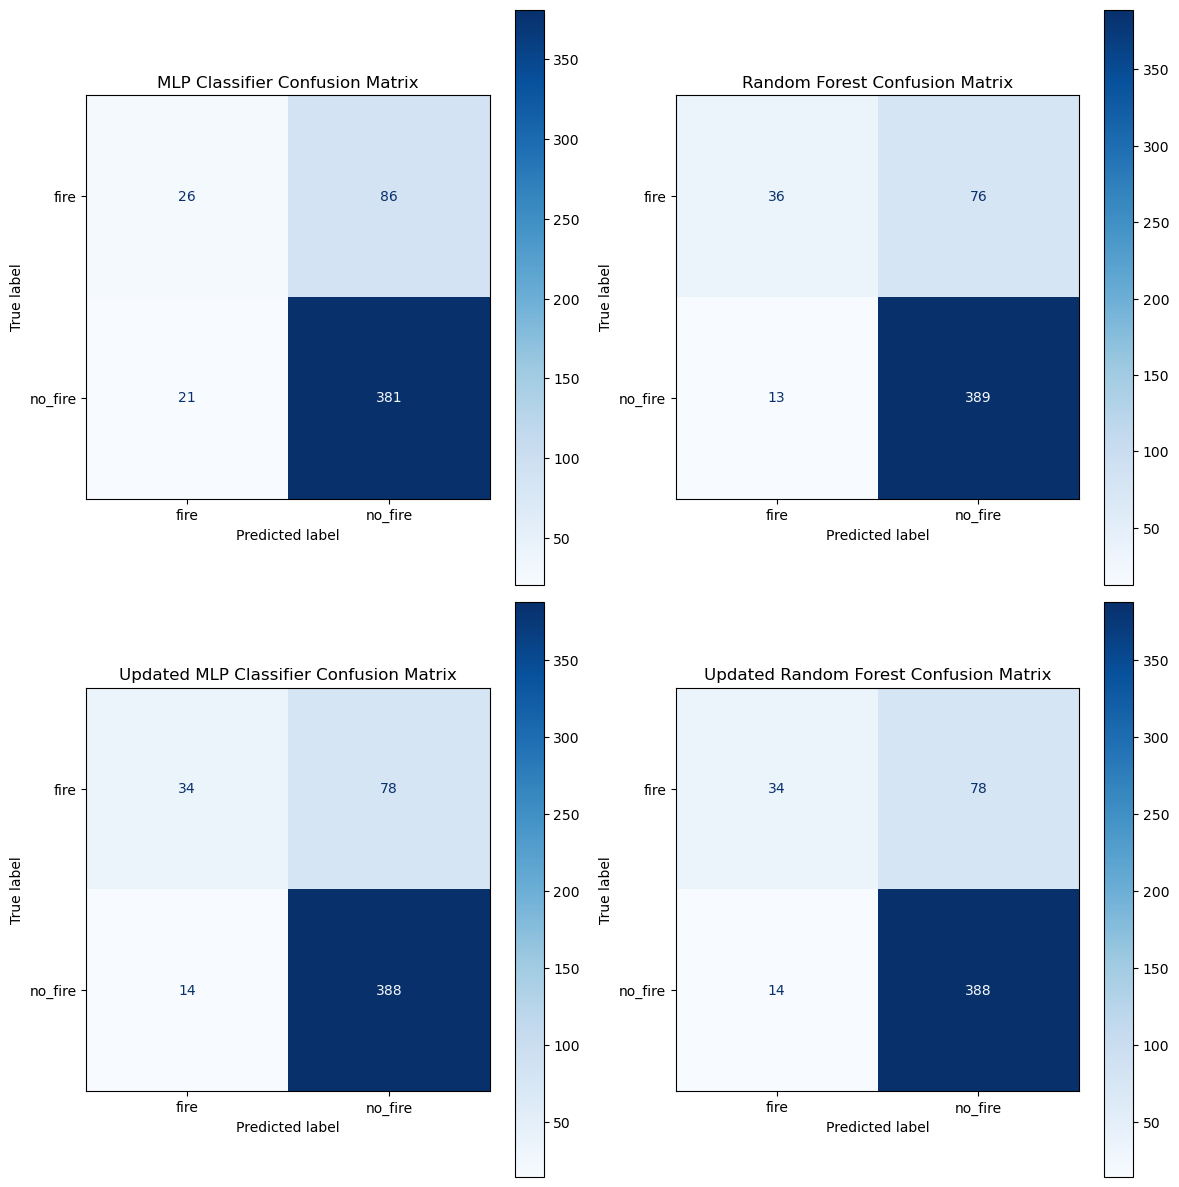

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

mlpc_model = joblib.load('mlpc_model.joblib')
rf_model = joblib.load('rf_model.joblib')
best_mlpc_model = joblib.load('best_mlpc_model.joblib')
best_rf_model = joblib.load('best_rf_model.joblib')

y_pred_mlpc = mlpc_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_updated_mlpc = best_mlpc_model.predict(X_test_scaled)
y_pred_updated_rf = best_rf_model.predict(X_test_scaled)

cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_updated_mlpc = confusion_matrix(y_test, y_pred_updated_mlpc)
cm_updated_rf = confusion_matrix(y_test, y_pred_updated_rf)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ConfusionMatrixDisplay(cm_mlpc, display_labels=label_encoder.classes_).plot(ax=ax[0,0], cmap='Blues')
ax[0,0].set_title('MLP Classifier Confusion Matrix')

ConfusionMatrixDisplay(cm_rf, display_labels=label_encoder.classes_).plot(ax=ax[0,1], cmap='Blues')
ax[0,1].set_title('Random Forest Confusion Matrix')

ConfusionMatrixDisplay(cm_updated_mlpc, display_labels=label_encoder.classes_).plot(ax=ax[1,0], cmap='Blues')
ax[1,0].set_title('Updated MLP Classifier Confusion Matrix')

ConfusionMatrixDisplay(cm_updated_rf, display_labels=label_encoder.classes_).plot(ax=ax[1,1], cmap='Blues')
ax[1,1].set_title('Updated Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()
